# Design of experiments

> *The term experiment is defined as the systematic procedure carried out under controlled conditions in order to discover an unknown effect, to test or establish a hypothesis, or to illustrate a known effect. When analyzing a process, experiments are often used to evaluate which process inputs have a significant impact on the process output, and what the target level of those inputs should be to achieve a desired result (output).* *


**Cake-baking process example**

![Cake-baking process example](https://media.moresteam.com/main/pics/4081.gif)




[* https://www.moresteam.com/toolbox/design-of-experiments.cfm](https://www.moresteam.com/toolbox/design-of-experiments.cfm)



---



In [0]:
# Install dependencies
!pip install pyDOE

  Stored in directory: /root/.cache/pip/wheels/7c/c8/58/a6493bd415e8ba5735082b5e0c096d7c1f2933077a8ce34544
Successfully built pyDOE


In [0]:
# Mount Google Drive folder and create PML folder
from google.colab import drive
drive.mount('/content/drive/')
%mkdir -p /content/drive/My\ Drive/PML

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# Import all dependencies
from pyDOE import lhs
from scipy.stats.distributions import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
# Parameters to Adjust
NUMBER_INPUTS = 2
NUMBER_SAMPLES = 10

# Boundaries for each input (LOWER, UPPER)
INPUTS_BOUNDARIES = [
    [2, 6],
    [0.75, 3]
]

In [0]:
# Generate DoE data (lhs - Latin-hypercube)
doe = lhs(NUMBER_INPUTS, samples=NUMBER_SAMPLES, criterion='maximin', iterations=10000)

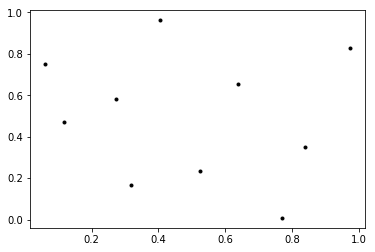

In [0]:
plt.plot(doe[:,0],doe[:,1], '.k')
plt.show()

In [0]:
# Scale DoE data to Input Boundaries
scaledDoe = doe.copy()
for i in range(NUMBER_INPUTS):
  scaledDoe[:,i] = scaledDoe[:,i]*(INPUTS_BOUNDARIES[i][1]-INPUTS_BOUNDARIES[i][0]) + INPUTS_BOUNDARIES[i][0]

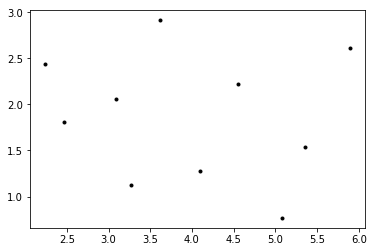

In [0]:
plt.plot(scaledDoe[:,0],scaledDoe[:,1], '.k')
plt.show()

In [0]:
# Create DataFrame table with scaled DoE data
df = pd.DataFrame(scaledDoe)

In [0]:
# Name input cols as x1,x2.. and add empty output col y
df.columns = [ "x{}".format(i+1) for i in range(NUMBER_INPUTS)]
df['y']=''

In [0]:
# Preview data table
df

,x1,x2,y
0,2.462127,1.814378,
1,4.556252,2.221147,
2,3.265896,1.126927,
3,5.892280,2.617749,
4,4.101892,1.280560,
5,5.083637,0.767965,
6,2.243664,2.439529,
7,5.355385,1.535258,
8,3.086517,2.059464,
9,3.614774,2.914214,


In [0]:
# Save DoE data to Google Drive PML folder
df.to_excel('drive/My Drive/PML/doe.xlsx', index=False)